<a href="https://colab.research.google.com/github/hichamtalha/ML-Clustering/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

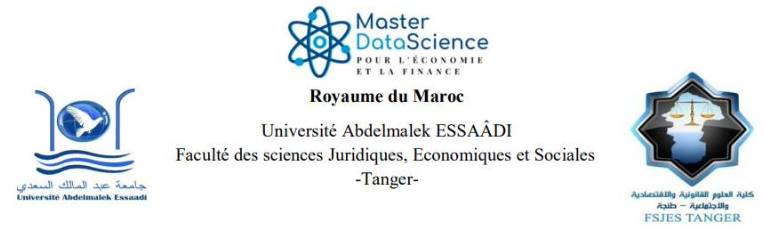


Réalisé par : Hicham TALHA

Enacdré par : Mr. Abdelhak TALI

#customer-segmentation
 Nous utiliserons les données des clients du centre commercial disponibles gratuitement sur Kaggle ***Mall_Customers.csv***. Ces données contiennent les informations de base suivantes pour chaque client : ID, Genre, Âge, Revenu et Score de dépenses annuelles.Nous allons essayer de regrouper ces données en fonction de ces caractéristiques.

##Importer les bibliothèques et charger les données


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the customer data into a DataFrame
customer_df = pd.read_csv('/content/Mall_Customers.csv')

# Check the first 5 rows
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Explorer les données
Avant de poursuivre la mise en œuvre de l'algorithme, examinons rapidement les données d'un point de vue statistique et visuel.

Text(0, 0.5, 'Spending Score (1-100)')

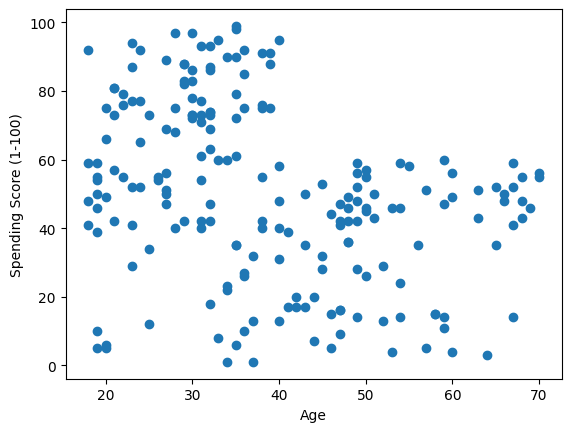

In [25]:
plt.scatter(customer_df["Age"],
            customer_df["Spending Score (1-100)"])

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

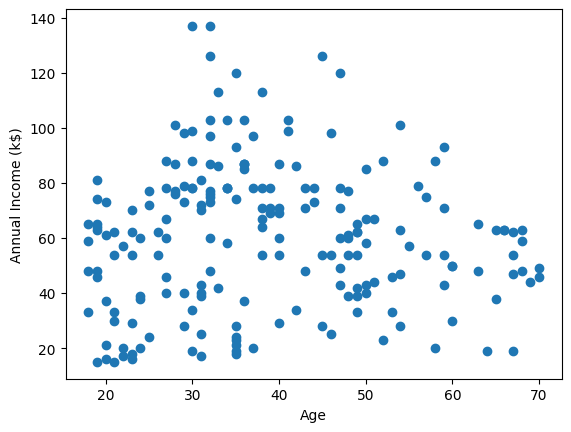

In [26]:
plt.scatter(customer_df["Age"],
            customer_df["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

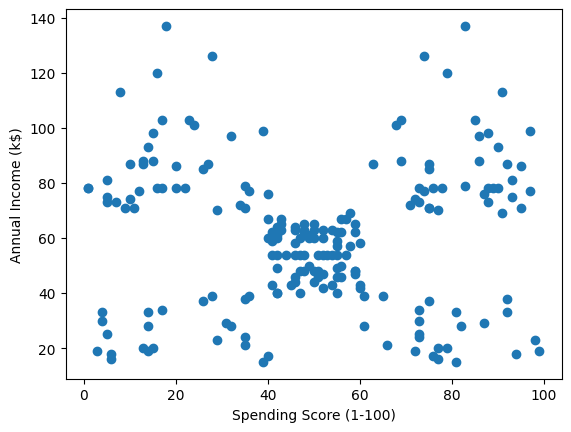

In [27]:
plt.scatter(customer_df["Spending Score (1-100)"],
            customer_df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

Tous ces graphiques ont des résultats différents, ce qui conduit à des interprétations différentes. Par exemple, le premier graphique semble proposer deux groupes de clients différents, tandis que le deuxième n'est pas évident et que le dernier semble indiquer qu'il y a cinq groupes différents. C'est là que les Kmeans seront utiles pour générer efficacement les groupes corrects.






Nous remarquons également dans le résultat suivant qu'il n'y a pas de valeurs manquantes dans les données.

In [28]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Obtenir les colonnes pertinentes pour le regroupement

Toutes les colonnes ne sont pas pertinentes pour le regroupement. Dans cet exemple, nous utiliserons les colonnes numériques : Âge, revenu annuel et score de dépenses

In [29]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

##Transformation des données
K-means est sensible aux unités de mesure et aux échelles des données. Il est préférable de standardiser les données en premier afin de résoudre ce problème. C'est également une pratique courante avant de mettre en œuvre n'importe quel modèle d'apprentissage automatique.

Essentiellement, la standardisation soustrait la moyenne de chaque caractéristique des valeurs réelles de cette caractéristique et divise l'écart-type de la caractéristique.

Le processus est simple et se fait comme suit en Python :

** Utilisez la classe StandardScaler du module sklearn.preprocessing.

** Appliquez la méthode fit() pour calculer la moyenne et l'écart-type des caractéristiques.

** Ensuite, utilisez la méthode transform() pour mettre à l'échelle les données

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)

##Déterminer le meilleur nombre de clusters
Un modèle de regroupement ne sera pas pertinent si nous ne parvenons pas à identifier le nombre correct de clusters à considérer. Plusieurs techniques existent dans la littérature. Nous allons considérer la méthode du coude (Elbow), qui est une méthode heuristique et largement utilisée pour trouver le nombre optimal de clusters.

La première fonction auxiliaire crée, pour chaque valeur de K, le modèle KMeans correspondant et enregistre son inertie ainsi que la valeur K réelle.

La deuxième fonction utilise ces inerties et valeurs K pour générer le graphique final du coude.

In [31]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

In [32]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

Maintenant, nous pouvons appliquer les fonctions à l'ensemble de données en utilisant une valeur maximale de K de 12 et obtenir le résultat final.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

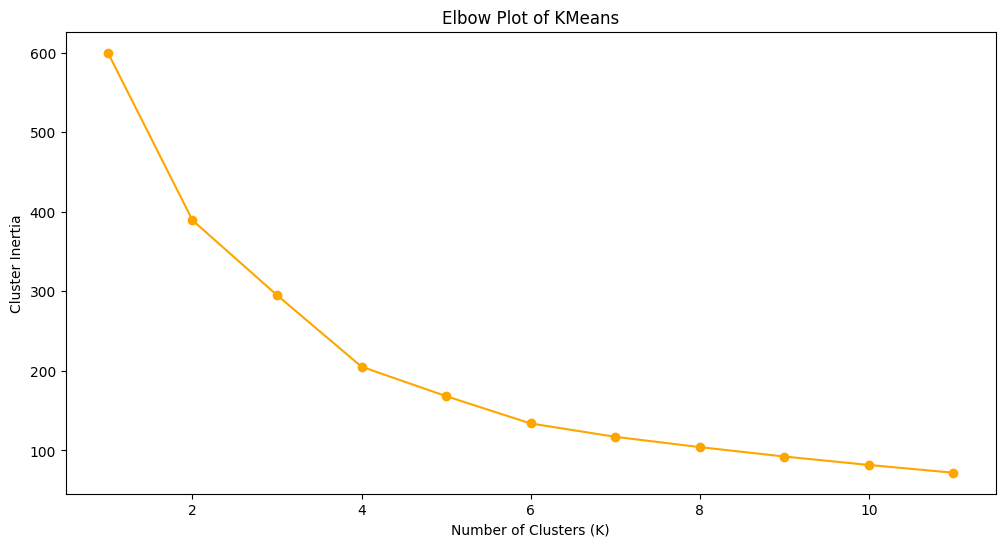

In [33]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

À partir du graphique, nous remarquons que l'inertie du regroupement diminue à mesure que nous augmentons le nombre de clusters. De plus, la diminution de l'inertie est minimale après K=5, ce qui indique que 5 peut être considéré comme le nombre optimal de clusters.

##Créer le modèle KMeans final
Une fois que nous avons déterminé le nombre optimal de clusters, nous pouvons enfin appliquer le modèle KMeans à cette valeur comme suit.

In [34]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Nous pouvons accéder au cluster auquel chaque point de données appartient en utilisant l'attribut labels_. Créons une nouvelle colonne correspondant à ces valeurs.

In [35]:
customer_df["clusters"] = kmeans_model.labels_

customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,4
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,4


En examinant les cinq premiers clients, nous pouvons observer que les deux premiers et les deux derniers ont été attribués au premier cluster (cluster n°1), tandis que le troisième client appartient au troisième cluster (cluster n°3).

##Visualiser les clusters
Maintenant que nous avons généré les clusters, la dernière étape consiste à les visualiser.

Text(0, 0.5, 'Annual Income (k$)')

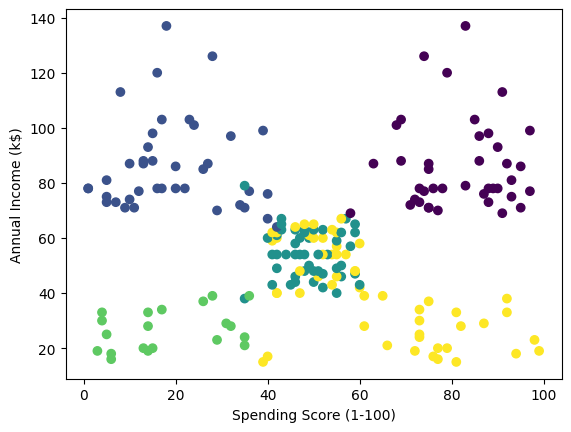

In [37]:
plt.scatter(customer_df["Spending Score (1-100)"],
            customer_df["Annual Income (k$)"],
            c = customer_df["clusters"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

##Conclusion:
Le regroupement KMeans semble générer un résultat assez bon, et les cinq clusters sont bien séparés les uns des autres, même s'il y a un léger chevauchement entre les clusters violet et jaune.

L'observation générale est la suivante :

Les clients en haut à gauche ont un faible score de dépenses et un revenu annuel élevé. Une bonne stratégie marketing pourrait être mise en œuvre pour cibler ces clients afin qu'ils dépensent davantage.
D'autre part, les clients en bas à gauche ont un faible revenu annuel et dépensent également moins, ce qui est logique car ils essaient d'ajuster leurs habitudes de dépenses à leur budget.
Les clients en haut à droite sont similaires à ceux en bas à gauche, la différence étant qu'ils ont un budget suffisant pour dépenser.
Enfin, le groupe de clients jaunes dépense au-delà de leur budget.